In [1]:
# coding=utf-8
import json
from operator import itemgetter

data_path = "E:/Abaqusdir/auto/output"
file_name = "pm1508.json"
with open(data_path + "/" + file_name) as f:
    d = json.load(f)

bound_pts = sorted(d['bound_pts'], key=itemgetter(0))
inner_pts = sorted(d['inner_pts'], key=itemgetter(0))

In [7]:
from math import sqrt
from numpy import std

def distance(pt1, pt2):
    return abs(pt1[0] - pt2[0]) + abs(pt1[1] - pt2[1])

def eldis(pt1, pt2):
    x2 = (pt2[0] - pt1[0]) ** 2
    y2 = (pt2[1] - pt1[1]) ** 2
    z2 = (pt2[2] - pt1[2]) ** 2
    return sqrt(x2 + y2 + z2)

def avg(pts):
    cnt = sum([p[-1] for p in pts]) + 0.0
    return cnt / len(pts)

def err(pts):
    err_val = std([p[-1] for p in pts]) + 0.0
    return err_val

d.keys()

dict_keys(['bound_stderr', 'inner_pts', 'bound_pts'])

In [3]:
pt_pair = []

for pt_b in bound_pts:
    for pt_in in inner_pts:
        p1 = pt_b[:3]
        p2 = pt_in[:3]
        if distance(p1, p2) <= 1.0:
            pt_pair.append((pt_b, pt_in))

avg: -2.7366472166596036 std_err: 2.20900167107


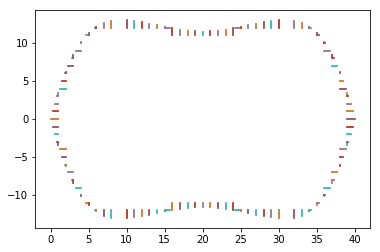

In [8]:
import matplotlib.pyplot as plt

avg_val = avg(d['bound_pts'])
std_err = err(d['bound_pts'])
print("avg:", avg_val, "std_err:", std_err)

for pb, pi in pt_pair:
    x1, x2 = pb[0], pi[0]
    y1, y2 = pb[1], pi[1]
    plt.plot([x1, x2], [y1, y2])
plt.show()

In [5]:
def judge_direction(pb, pi):
    if abs(pb[1] - pi[1]) < 0.0001:
        return "x"
    elif abs(pb[0] - pi[0]) < 0.0001:
        return "y"
    else:
        raise Exception("Wrong point pair!")

def target_point(pb, pi, target):
    pb_space, pi_space = pb[3:], pi[3:]
    res = judge_direction(pb, pi)
    out = None
    if res == "x":
        x_delta = pb[3] - pi[3]
        z_delta = pb[5] - pi[5]
        x_new = (target - pb[5]) * x_delta / z_delta + pb[3]
        out = (x_new, pb[4], target)
    elif res == "y":
        y_delta = pb[4] - pi[4]
        z_delta = pb[5] - pi[5]
        y_new = (target - pb[5]) * y_delta / z_delta + pb[4]
        out = (pb[3], y_new, target)
    return out

for pb, pi in pt_pair:
    pt = target_point(pb, pi, avg_val)
    print(pb[3:], pi[3:], pt, eldis(pt, pb[3:]), "---"*10,sep="\n")

[2.0127716064453125, 0.0, 1.0494929552078247]
[2.863858938217163, 9.106049066619541e-36, 1.5745177268981934]
(-4.124721537381482, 0.0, -2.7366472166596036)
7.211357673250524
------------------------------
[2.0127716064453125, 0.0, 1.0494929552078247]
[2.863858938217163, 9.106049066619541e-36, 1.5745177268981934]
(-4.124721537381482, 0.0, -2.7366472166596036)
7.211357673250524
------------------------------
[2.2242932319641113, 0.9972021579742432, 1.1166459321975708]
[2.844949722290039, 0.9967690110206604, 1.4964419603347778]
(-4.072695743135558, 0.9972021579742432, -2.7366472166596036)
7.382407347441377
------------------------------
[2.2242932319641113, 0.9972021579742432, 1.1166459321975708]
[2.844949722290039, 0.9967690110206604, 1.4964419603347778]
(-4.072695743135558, 0.9972021579742432, -2.7366472166596036)
7.382407347441377
------------------------------
[2.2242932319641113, -0.9972021579742432, 1.1166459321975708]
[2.844949722290039, -0.9967690110206604, 1.4964419603347778]
(-4

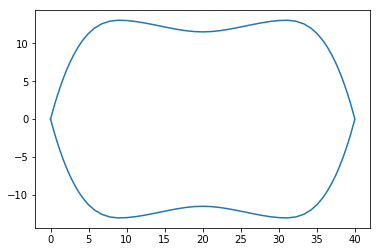

In [6]:
import scipy as sp
import numpy as np
from scipy.interpolate import splprep, splev
x = []
y = []
data = sorted(d['bound_pts'], key=lambda x: x[0])
for pt in data:
    if pt[1] < 0:
        continue
    x.append(pt[0])
    y.append(pt[1])
for pt in data[::-1]:
    if pt[1] >= 0:
        continue
    x.append(pt[0])
    y.append(pt[1])
x.append(0)
y.append(0)
tck, u = splprep([x, y], s=0, k=5)
unew = np.arange(0, 1.01, 0.01)
out = splev(unew, tck)
plt.figure()
plt.plot(out[0], out[1])
plt.show()

In [9]:
lst = [(-3.7861401718674284, 0.0), (-3.580932794195233, 1.0), (-3.216762153488217, 2.0), (-2.716286627632199, 3.0), (-2.0567713063774686, 4.0), (-1.2844224256096464, 5.0), (-0.4303252082882505, 6.0), (0.5175453144492526, 7.0), (1.0, 6.90739932475668), (1.5531808453978915, 8.0), (2.0, 8.45208355603796), (2.6750701981963534, 9.0), (3.0, 9.413556544166623), (3.9028557855071444, 10.0), (4.0, 10.07504018960577), (5.0, 10.594130603653012), (5.256295354980411, 11.0), (6.0, 11.014019576889096), (6.849624546188297, 12.0), (7.0, 11.351520149093686), (8.0, 11.599079219680844), (10.0, 11.7187143248139), (11.0, 11.523055641037045), (12.0, 11.196300117355404), (13.0, 10.793300716262875), (13.339615432601986, 12.0), (14.0, 10.356447307449399), (15.0, 9.917791454177914), (16.0, 9.518315879684506), (17.0, 9.172274200302182), (18.0, 8.904683677536068), (19.0, 8.734823314529477), (20.0, 8.676371185165463), (21.0, 8.734823314529477), (22.0, 8.904683677536068), (23.0, 9.172274200302182), (24.0, 9.518315879684506), (25.0, 9.917791454177914), (26.0, 10.356447307449399), (26.66038456739801, 12.0), (27.0, 10.793300716262875), (28.0, 11.196300117355404), (29.0, 11.523055641037045), (30.0, 11.7187143248139), (32.0, 11.599079219680844), (33.0, 11.351520149093686), (33.15037593064886, 12.0), (34.0, 11.014019576889096), (34.743703452926695, 11.0), (35.0, 10.594130842071591), (36.0, 10.07504042802435), (36.0971437376557, 10.0), (37.0, 9.413556782585202), (37.32493027864081, 9.0), (38.0, 8.45208379445654), (38.44681951222998, 8.0), (39.0, 6.907399563175259), (39.48245402989966, 7.0), (40.43032464204413, 6.0), (41.28442352829558, 5.0), (42.056772379261076, 4.0), (42.71628632960898, 3.0), (43.21676203427893, 2.0), (43.58093246636969, 1.0), (43.78614041028601, 0.0)]

print(lst)

[(-3.7861401718674284, 0.0), (-3.580932794195233, 1.0), (-3.216762153488217, 2.0), (-2.716286627632199, 3.0), (-2.0567713063774686, 4.0), (-1.2844224256096464, 5.0), (-0.4303252082882505, 6.0), (0.5175453144492526, 7.0), (1.0, 6.90739932475668), (1.5531808453978915, 8.0), (2.0, 8.45208355603796), (2.6750701981963534, 9.0), (3.0, 9.413556544166623), (3.9028557855071444, 10.0), (4.0, 10.07504018960577), (5.0, 10.594130603653012), (5.256295354980411, 11.0), (6.0, 11.014019576889096), (6.849624546188297, 12.0), (7.0, 11.351520149093686), (8.0, 11.599079219680844), (10.0, 11.7187143248139), (11.0, 11.523055641037045), (12.0, 11.196300117355404), (13.0, 10.793300716262875), (13.339615432601986, 12.0), (14.0, 10.356447307449399), (15.0, 9.917791454177914), (16.0, 9.518315879684506), (17.0, 9.172274200302182), (18.0, 8.904683677536068), (19.0, 8.734823314529477), (20.0, 8.676371185165463), (21.0, 8.734823314529477), (22.0, 8.904683677536068), (23.0, 9.172274200302182), (24.0, 9.518315879684506

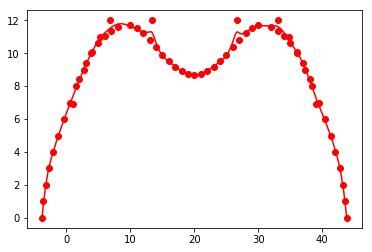

In [21]:
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline
import numpy as np

spl = UnivariateSpline([p[0] for p in lst], [p[1] for p in lst], s=3)
lb, rb = lst[0][0], lst[-1][0]

xx = np.linspace(lb, rb, 1000)
yy = spl(xx)

for p in lst:
    plt.plot(p[0], p[1], "ro")
plt.plot(xx, yy, "r")
plt.show()
